# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import tensorflow as tf
import tensorflow.keras.layers as tfl

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Displaying images and masks

In [2]:
def display_images(data, no_img_mask):
    
    # Load the images from the files
    images = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png')[:no_img_mask]
    masks = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png')[:no_img_mask]

    for i in range(len(images)):
        images[i] = cv2.imread(images[i])
        masks[i] = cv2.imread(masks[i], cv2.IMREAD_GRAYSCALE)



    fig, axes = plt.subplots(no_img_mask, 2)

    for i in range(len(images)):
        axes[i][0].imshow(images[i])
        axes[i][1].imshow(masks[i])

    # Show the plot
    plt.show()

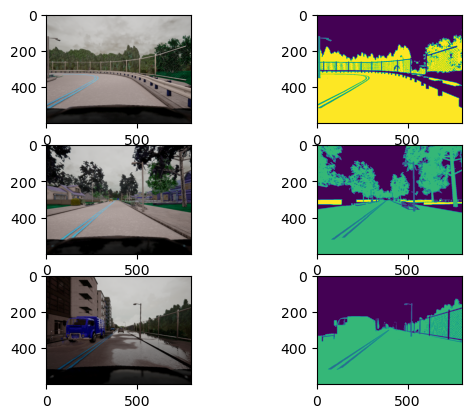

In [3]:
display_images('dataA', 3)

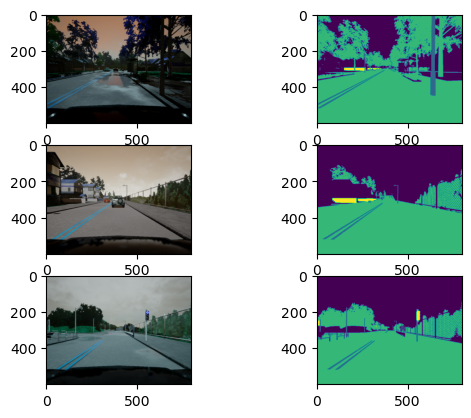

In [4]:
display_images('dataB', 3)

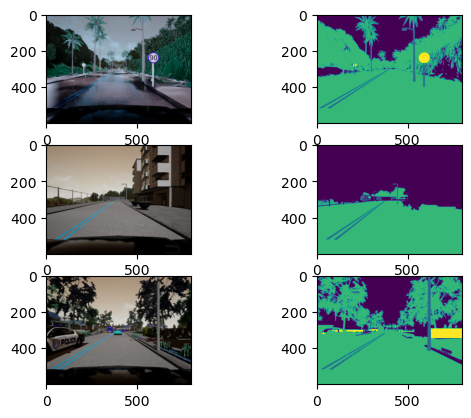

In [5]:
display_images('dataC', 3)

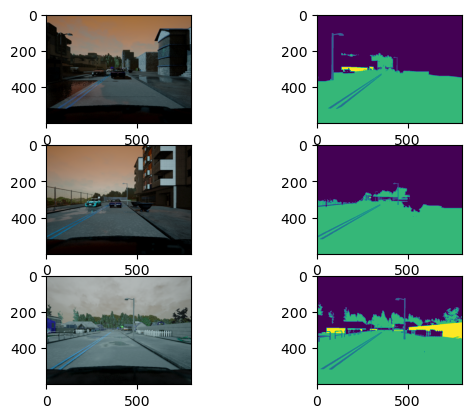

In [6]:
display_images('dataD', 3)

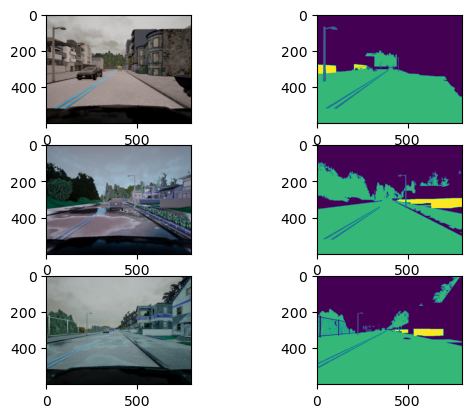

In [7]:
display_images('dataE', 3)

# Storing images and masks paths

In [8]:
images_list = []
masks_list = []
def store_imgs_masks(data):
    images_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png'))
    masks_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png'))


In [9]:
store_imgs_masks('dataA')
store_imgs_masks('dataB')
store_imgs_masks('dataC')
store_imgs_masks('dataD')
store_imgs_masks('dataE')

# Viewing the lists we just created

In [10]:
print(images_list[0][:5],'\n')
print(masks_list[0][:5])

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_040.png'] 

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_040.png']


# Transforming the list of lists of images and masks into one list for images and one for masks

In [11]:
def get_one_list(list_of_lists):
    
    one_list = []

    for sublist in list_of_lists:
        one_list.extend(sublist)
    return one_list

In [12]:
images_list = get_one_list(images_list)
masks_list = get_one_list(masks_list)

In [13]:
print(images_list[50], '\n')
print(masks_list[50])

/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F62-70.png 

/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F62-70.png


# Transforming the lists  to tensors

In [14]:
image_list_ds = tf.data.Dataset.list_files(images_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(masks_list, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_000.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_000.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_001.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_001.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_010.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_010.png'>)


# Combining images and masks into pairs

In [15]:
image_filenames = tf.constant(images_list)
masks_filenames = tf.constant(masks_list)
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', shape=(), dtype=string)
tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', shape=(), dtype=string)


# Preprocessing of images and masks

In [16]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (192, 256), method='nearest')
    input_mask = tf.image.resize(mask, (192, 256), method='nearest')

    return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

# Knowing number of classes

In [17]:
"""uniques = set()

for img, mask in image_ds.take(5000):
    uniques.update(np.unique(mask.numpy()))
    
print(uniques)"""

'uniques = set()\n\nfor img, mask in image_ds.take(5000):\n    uniques.update(np.unique(mask.numpy()))\n    \nprint(uniques)'

# Building Unet V2 architecture

### I will build three architectures to see the difference among all of them and how the accuracy gets improved

## Encoder (Downsampling Block)

In [18]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    
    if dropout_prob > 0:
        conv = tfl.Dropout(dropout_prob)(conv)
        
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(conv)
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

## Decoder (Upsampling Block)

In [19]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    return conv

## Build the Model

In [20]:
def unet_model(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)
    
    cblock1 = conv_block(inputs, n_filters)
    
    cblock2 = conv_block(cblock1[0], n_filters * 2)
    cblock3 = conv_block(cblock2[0], n_filters * 4)
    cblock4 = conv_block(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    cblock5 = conv_block(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters)
    
    conv9 = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = tfl.Conv2D(n_classes, 1, padding='same')(conv9)
    
    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    
    return model

# Defining models

In [21]:
img_height = 192
img_width = 256
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))

# Models' architectures

In [22]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 192, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 192, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

# Compiling models

In [23]:
unet.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Displaying some images

In [24]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

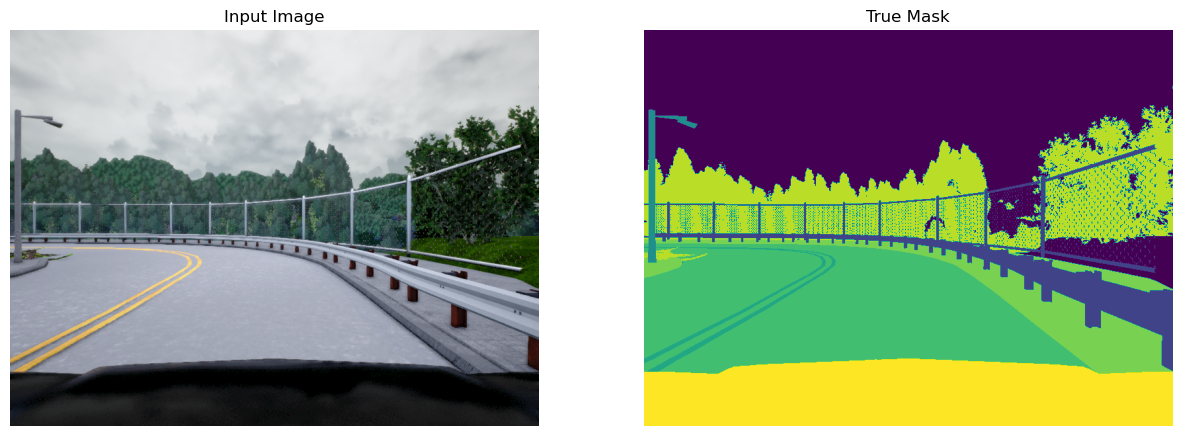

In [25]:
for image, mask in image_ds.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

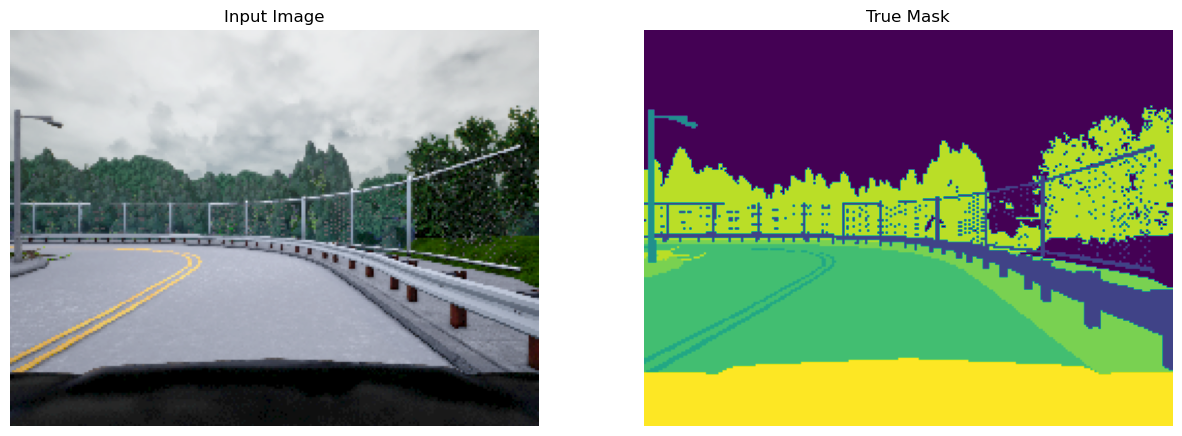

In [26]:
for image, mask in processed_image_ds.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

# Training models

In [27]:
EPOCHS = 50
BUFFER_SIZE = 1000
BATCH_SIZE = 64
map_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# Splitting data to training set and val set
num_samples = map_dataset.reduce(0, lambda x, _: x + 1).numpy()
train_dataset = map_dataset.take(int(0.8 * num_samples))
val_dataset = map_dataset.skip(int(0.8 * num_samples))
print(processed_image_ds)
# ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
early_stop = tf.keras.callbacks.EarlyStopping(patience=8)

<_MapDataset element_spec=(TensorSpec(shape=(192, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 256, 1), dtype=tf.uint8, name=None))>


In [28]:
model_history1 = unet.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

Epoch 1/50


2024-04-15 22:28:11.818511: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


63/63 [==============================] - 64s 670ms/step - loss: 7583.6924 - accuracy: 0.2096 - val_loss: 16242981.0000 - val_accuracy: 0.1462 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - 41s 650ms/step - loss: 1615032.5000 - accuracy: 0.1766 - val_loss: 266208192.0000 - val_accuracy: 0.2024 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - 41s 649ms/step - loss: 14532026368.0000 - accuracy: 0.2092 - val_loss: 160980729856.0000 - val_accuracy: 0.2079 - lr: 1.0000e-04
Epoch 4/50
63/63 [==============================] - 41s 650ms/step - loss: 541793484800.0000 - accuracy: 0.1914 - val_loss: 907718033408.0000 - val_accuracy: 0.1950 - lr: 1.0000e-05
Epoch 5/50
63/63 [==============================] - 41s 649ms/step - loss: 1242392035328.0000 - accuracy: 0.1973 - val_loss: 1022500077568.0000 - val_accuracy: 0.1978 - lr: 1.0000e-06
Epoch 6/50
63/63 [==============================] - 41s 649ms/step - loss: 1398405726208.0000 - accuracy: 0.1981 - val_loss: 114

In [29]:
import plotly.graph_objs as go
from plotly.offline import iplot
# Get the training results
acc = model_history1.history['accuracy']
val_acc = model_history1.history['val_accuracy']
loss = model_history1.history['loss']
val_loss = model_history1.history['val_loss']
lr = model_history1.history['lr']



##### Plot Training And Validation Accuracy ######

# Create template for hovertool
hovertemplate = ' Accuracy: %{y:.3f}<br>Epoch: %{x}'

# Set up the data
trace1 = go.Scatter(x = list(range(1, len(acc)+1)), 
                    y = acc, 
                    name = 'Training',
                    marker = dict(color = '#cc3600'),
                    hovertemplate = hovertemplate)

trace2 = go.Scatter(x = list(range(1, len(acc)+1)), 
                    y = val_acc, 
                    name = 'Testing',
                    marker = dict(color = '#0033cc'),
                    hovertemplate = hovertemplate)

# Set up the layout
layout = go.Layout(title = 'Accuracy During The Training',
                   font = dict(family = 'sans-serif',
                               size = 14,
                               color = '#2f2f2f'),
                   xaxis = dict(title = 'Epoch'),
                   yaxis = dict(title = 'Accuracy',
                                type='log'),
                   plot_bgcolor = '#ffdacc',
                   hovermode='x')

# Create the plot
fig = go.Figure(data=[trace1, trace2], layout=layout)
iplot(fig)



##### Plot Training And Validation Loss ######

# Create template for hovertool
hovertemplate = 'Loss:   %{y:.3f}<br>Epoch: %{x}'

# Set up the data
trace1 = go.Scatter(x = list(range(1, len(loss)+1)), 
                    y = loss, 
                    name = 'Training',
                    marker = dict(color = '#cc3600'),
                    hovertemplate = hovertemplate)

trace2 = go.Scatter(x = list(range(1, len(loss)+1)), 
                    y = val_loss, 
                    name = 'Testing',
                    marker = dict(color = '#0033cc'),
                    hovertemplate = hovertemplate)

# Set up the layout
layout = go.Layout(title = 'Loss During The Training',
                   font = dict(family = 'sans-serif',
                               size = 14,
                               color = '#2f2f2f'),
                   xaxis = dict(title = 'Epoch'),
                   yaxis = dict(title = 'Loss',
                                type='log'),
                   plot_bgcolor = '#ffdacc',
                   hovermode='x')

# Create the plot
fig = go.Figure(data=[trace1, trace2], layout=layout)
iplot(fig)



##### Plot Learning Rate ######

# Create template for hovertool
hovertemplate = 'Learning Rate:  %{y:.3f}<br>Epoch: %{x}'

# Set up the data
trace1 = go.Scatter(x = list(range(1, len(lr)+1)), 
                    y = lr, 
                    name = 'Training',
                    marker = dict(color = '#cc3600'),
                    hovertemplate = hovertemplate)

# Set up the layout
layout = go.Layout(title = 'Learning Rate During The Training',
                   font = dict(family = 'sans-serif',
                               size = 14,
                               color = '#2f2f2f'),
                   xaxis = dict(title = 'Epoch'),
                   yaxis = dict(title = 'Learning Rate',
                                type='log'),
                   plot_bgcolor = '#ffdacc',
                   hovermode='x')

# Create the plot
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

# Function to process the predicted mask

In [30]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

# Models' performance

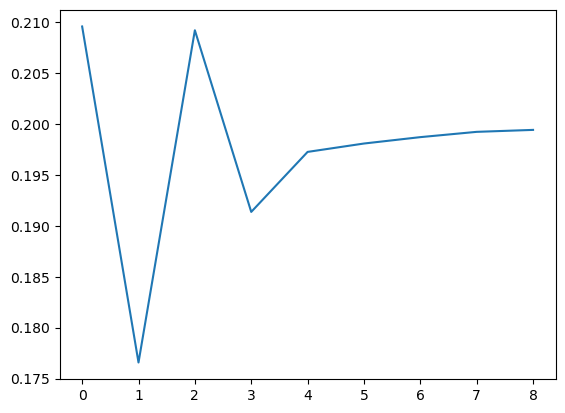

In [31]:
plt.plot(model_history1.history["accuracy"])